# Synthetic Dataset #


This dataset is synthetically generated to demonstrate the work of the Logistic Regression

Importing the logistic regression

In [1]:
import sys
sys.path.append('..')  
from evo_learn.logistic_regression import LogisticRegression

Generating the dataset:

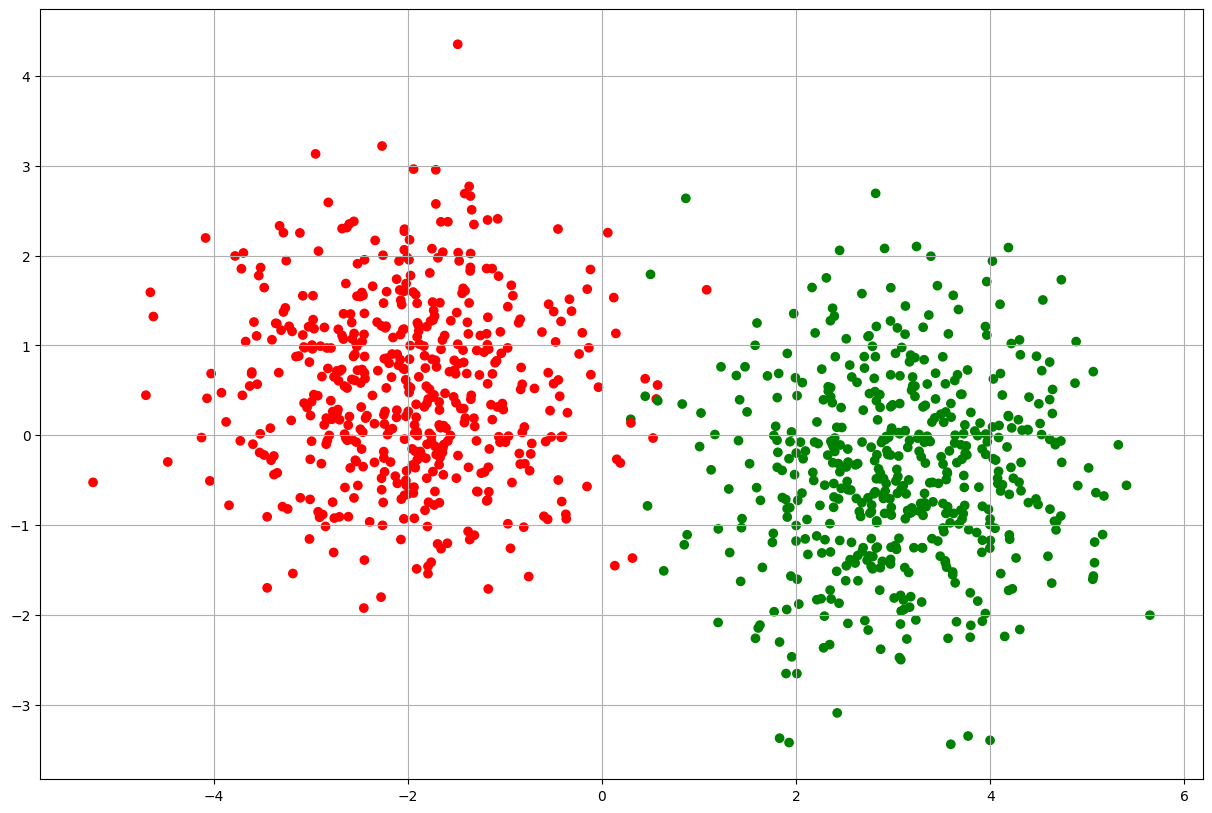

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.grid()
plt.show();
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Gradient-Based Optimizer ##

Let's define Logistic Regression and fit it with gradient optimizer

In [3]:
clf = LogisticRegression()
clf.fit(X_train, y_train, max_iterations=1000, gradient_optimizer=True)
w = clf.get_weights()

The decision boundary visualization:

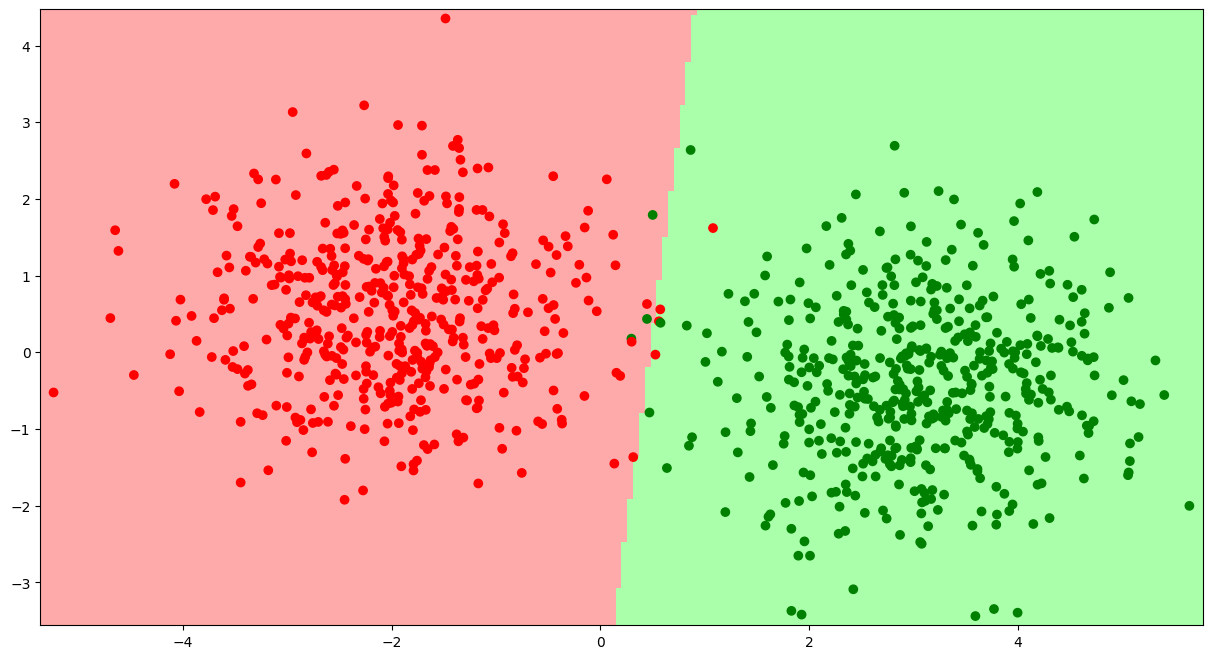

In [4]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

Classification report:

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.99      1.00      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



## Evolutionary-Based Optimizer  ##

Let's define new Logistic Regression and fit it with Evolutionary Optimizer

In [12]:
clf = LogisticRegression()
clf.fit(X_train, y_train, max_iterations=250, gradient_optimizer=False, num_runs=5)
w = clf.get_weights()

Iteration: 1, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 2, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 3, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 4, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 5, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 6, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 7, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 8, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 9, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 10, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 11, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 12, Queen: [0.003668, 23.97, 0.005943], Fitness: 0.017361751293855362
Iteration: 13, Queen: [0.003668, 23.9

Visualizing the Decision Boundary

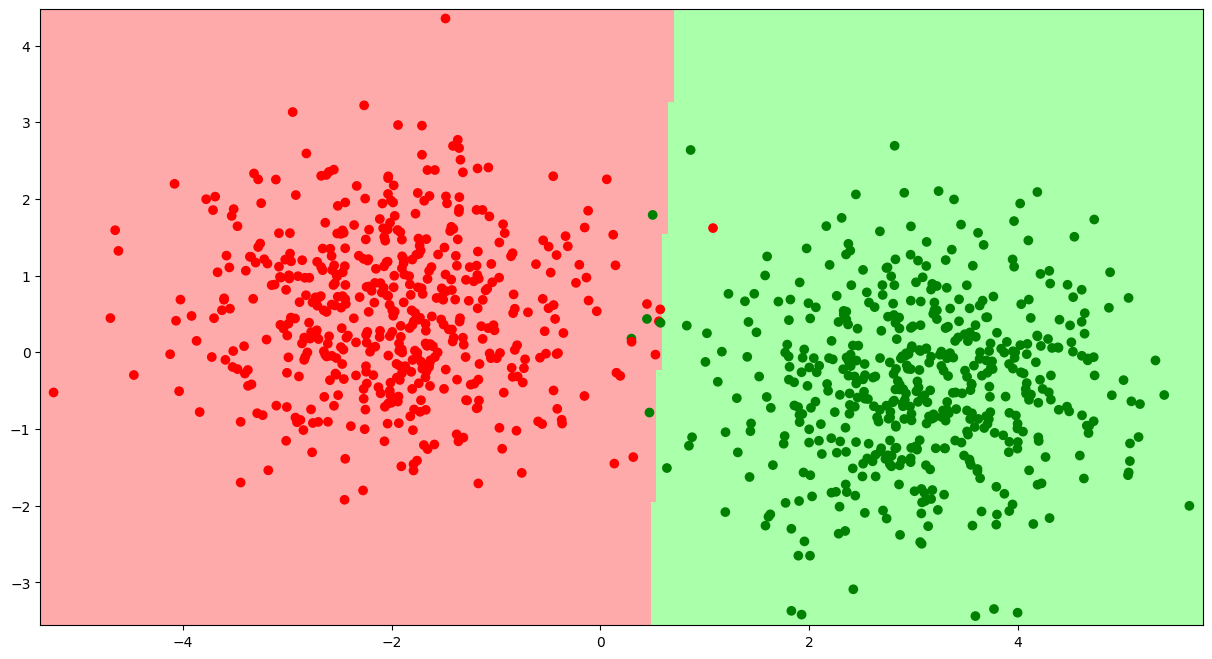

In [13]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

Classificaiton Report

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       500
           1       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



# Conclusion #

This dataset is very simple and both optimizer showed ideal results. Evaluation on this dataset was performed to demonstrate that the Logistic Regression works properly.

# Hyperparameter tuner (demonstration)

Here is the demonstration of the hyperparameter tuner. It uses evolutionary algorithm and tries different hyperparameter values and picks the model with the highest AUC-score.

In [ ]:
from evo_learn.hyperparameter_tuner import HyperparameterTuner

# Initialize the HyperparameterTuner and tune the model
tuner = HyperparameterTuner()
best_params, best_auc, best_model = tuner.tune(X_train, y_train, X_test, y_test)

# Unpack the best hyperparameters
optimizer_type, regularization, C, max_iterations, num_runs_or_lr = best_params

# Print the best hyperparameter details and AUC
print(f"Best Optimizer: {optimizer_type}")
if optimizer_type == 'gradient':
    print(f"Best Hyperparameters: lr={num_runs_or_lr}, C={C}, regularization={regularization}, max_iterations={max_iterations}")
else:
    print(f"Best Hyperparameters: num_runs={num_runs_or_lr}, C={C}, regularization={regularization}, max_iterations={max_iterations}")
print(f"Best AUC: {best_auc}")

c:\Users\Dinar\Desktop\Quantum-inspired-Evolutionary-Algorithms\evaluation\..\evo_learn\hyperparameter_tuner.py:26: RuntimeWarning: invalid value encountered in scalar add
  normalized_list = [(val + FLOAT16_MAX) / (2 * FLOAT16_MAX) for val in float_list]
c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Dinar\Desktop\Quantum-inspired-Evolutionary-Algorithms\evaluation\..\evo_learn\logistic_regression.py:166: RuntimeWarning: invalid value encountered in square
  cost += ((C / X_training.shape[0]) * np.sum(np.abs(weights[1:])) + C*np.sum(np.square(weights[1:])))


Iteration: 1, Queen: [np.float16(0.9365), np.float16(1.105), np.float16(0.06647)], Fitness: 0.41911432074349214
Iteration: 2, Queen: [np.float16(0.9365), np.float16(1.105), np.float16(0.06647)], Fitness: 0.41911432074349214
Iteration: 3, Queen: [np.float16(0.9365), np.float16(1.105), np.float16(0.06647)], Fitness: 0.41911432074349214
Iteration: 4, Queen: [np.float16(0.9365), np.float16(1.105), np.float16(0.06647)], Fitness: 0.41911432074349214
Iteration: 5, Queen: [np.float16(-6.78e-05), np.float16(2.22), np.float16(0.06586)], Fitness: 0.20889073337475353
Iteration: 6, Queen: [np.float16(-6.78e-05), np.float16(2.22), np.float16(0.06586)], Fitness: 0.20889073337475353
Iteration: 7, Queen: [np.float16(-6.78e-05), np.float16(2.22), np.float16(0.06586)], Fitness: 0.20889073337475353
Iteration: 8, Queen: [np.float16(-6.78e-05), np.float16(2.22), np.float16(0.06586)], Fitness: 0.20889073337475353
Iteration: 9, Queen: [np.float16(-6.78e-05), np.float16(2.22), np.float16(0.06586)], Fitness: 0.

c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 1, Queen: [np.float16(0.00011754), np.float16(11.66), np.float16(0.00011104)], Fitness: 0.020732518706205377
Iteration: 2, Queen: [np.float16(0.00011754), np.float16(11.66), np.float16(0.00011104)], Fitness: 0.020732518706205377
Iteration: 3, Queen: [np.float16(0.00011754), np.float16(11.66), np.float16(0.00011104)], Fitness: 0.020732518706205377
Iteration: 4, Queen: [np.float16(0.00011754), np.float16(11.66), np.float16(0.00011104)], Fitness: 0.020732518706205377
Iteration: 5, Queen: [np.float16(0.00011754), np.float16(11.66), np.float16(0.00011104)], Fitness: 0.020732518706205377
Iteration: 6, Queen: [np.float16(0.00011754), np.float16(11.66), np.float16(0.00011104)], Fitness: 0.020732518706205377
Iteration: 7, Queen: [np.float16(0.00011754), np.float16(11.66), np.float16(0.00011104)], Fitness: 0.020732518706205377
Iteration: 8, Queen: [np.float16(0.00011754), np.float16(11.66), np.float16(0.00011104)], Fitness: 0.020732518706205377
Iteration: 9, Queen: [np.float16(0.00011

c:\Users\Dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 1, Queen: [np.float16(0.0002011), np.float16(15.14), np.float16(0.004635)], Fitness: 0.021466156832282413
Iteration: 2, Queen: [np.float16(0.0002011), np.float16(15.14), np.float16(0.004635)], Fitness: 0.021466156832282413
Iteration: 3, Queen: [np.float16(0.0002011), np.float16(15.14), np.float16(0.004635)], Fitness: 0.021466156832282413
Iteration: 4, Queen: [np.float16(0.0002011), np.float16(15.14), np.float16(0.004635)], Fitness: 0.021466156832282413
Iteration: 5, Queen: [np.float16(0.0002011), np.float16(15.14), np.float16(0.004635)], Fitness: 0.021466156832282413
Iteration: 6, Queen: [np.float16(0.0002011), np.float16(15.14), np.float16(0.004635)], Fitness: 0.021466156832282413
Iteration: 7, Queen: [np.float16(0.0002011), np.float16(15.14), np.float16(0.004635)], Fitness: 0.021466156832282413
Iteration: 8, Queen: [np.float16(0.0002011), np.float16(15.14), np.float16(0.004635)], Fitness: 0.021466156832282413
Iteration: 9, Queen: [np.float16(0.0002011), np.float16(15.14), 

In [ ]:
# Predict class labels using the best model
predictions = best_model.predict(X_test)

# Generate and print a classification report using scikit-learn
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)